# Markowitz portfolio theory/Mean-variance analysis

**References:**
- https://en.wikipedia.org/wiki/Modern_portfolio_theory

## Simple case with two assets

### Asset propetries
- Asset 1:
    - Mean: $E[R_{1}] = \mu_{1}$
    - Variance: $V[R_{1}]=\sigma^{2}_{1}$
- Asset 2:
    - Mean: $E[R_{2}] = \mu_{2}$
    - Variance: $V[R_{2}]=\sigma^{2}_{2}$
    
Covariance: $\rho \sigma_{1} \sigma_{2}$


**Vectorized form:**

Means:

\begin{equation}
    \mu
    =
    \begin{pmatrix}
        \mu_{1} \\
        \mu_{2}
    \end{pmatrix}
\end{equation}

Covariance matrix:

\begin{equation}
    C
    =
    \begin{bmatrix}
        \sigma^{2}_{1} & \rho \sigma_{1} \sigma_{2} \\
        \rho \sigma_{1} \sigma_{2} & \sigma^{2}_{2}
    \end{bmatrix}
\end{equation}

### Portfolio

The portfolio is described by amount of money allocatted to each asset relative to the total amount, denoted by $w_{i}$ (weights):

\begin{equation}
    w
    =
    \begin{pmatrix}
        w_{1} \\
        w_{2}
    \end{pmatrix}
\end{equation}

**Portfolio properties:**
- Mean: $E[R_{P}] = w^{T} \mu = w_{1} \mu_{1} + w_{2} \mu_{2}$
- Variance: $V[R_{P}] = w^{T} C w = w^{2}_{1} \sigma^{2}_{1} + 2 w_{1} w_{2} \rho \sigma_{1} \sigma_{2} + w^{2}_{2} \sigma^{2}_{2}$

In [1]:
import numpy as np
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def calc_portfolio_return_mean_var(weights, mu, C):
    
    portfolio_mean = np.dot(weights.T,mu)
    portfolio_var  = np.dot(weights.T,C).dot(weights)
    
    return portfolio_mean, portfolio_var

In [21]:
def generate_portfolios(mu1, mu2, sigma1, sigma2, rho):
    mu = np.array([mu1, mu2])
    portfolio_weights = [np.array([1.0-x, x]) for x in np.linspace(0.0, 1.0, 101)] 
    cov = rho*sigma1*sigma2
    C = np.array([[sigma1**2,   cov],
                 [cov,   sigma2**2]])
    portfolios_mean_var = np.array([calc_portfolio_return_mean_var(weights, mu, C) for weights in portfolio_weights])
    
    portfolio_means  = portfolios_mean_var[:,0]
    portfolio_vars   = portfolios_mean_var[:,1]
    portfolio_stddevs = np.sqrt(portfolio_vars)
    
    return portfolio_stddevs, portfolio_means

In [95]:
def plot_stddev_mean_portfolios(portfolio_stddevs, portfolio_means, plot_kwargs={}, a=None):
    
    if a is None:
        f,a = plt.subplots()

    a.scatter(portfolio_stddevs, portfolio_means, **plot_kwargs)
    a.scatter(portfolio_stddevs[50], portfolio_means[50], c='white')

    a.set_xlabel('Stddev[$R_{P}$]')
    a.set_ylabel('E[$R_{P}$]')
    stddev_max = portfolio_stddevs.max()
    mean_max = portfolio_means.max()

    a.set_xlim(0.0, 0.06)
    a.set_ylim(0.0, 0.06)
    
    if plot_kwargs != {}:
        plt.legend()

In [96]:
def create_portfolio_plot(mu1, mu2, sigma1, sigma2, rho):
    
    portfolio_stddevs, portfolio_means = generate_portfolios(mu1, mu2, sigma1, sigma2, rho)
    plot_stddev_mean_portfolios(portfolio_stddevs, portfolio_means)

## Fixed $\mu$s and $\sigma$s, varied $\rho$

In [97]:
portfolio_weights = [np.array([1.0-x, x]) for x in np.linspace(0.0, 1.0, 101)] 

In [98]:
mu1, sigma1 = 0.01, 0.01
mu2, sigma2 = 0.04, 0.05
rho = 0.3

In [99]:
cov = rho*sigma1*sigma2
mu = np.array([mu1, mu2])
C = np.array([[sigma1**2,   cov],
              [cov,   sigma2**2]])

In [100]:
rhos = [-0.99, -0.5, 0.0, 0.5, 0.99]

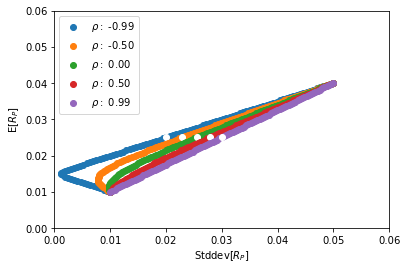

In [101]:
f,a = plt.subplots()
for i, rho in enumerate(rhos):
    portfolio_stddevs, portfolio_means = generate_portfolios(mu1, mu2, sigma1, sigma2, rho)
    c = "C{}".format(i)
    label = r"$\rho:$ {:.2f}".format(rho)
    plot_kwargs = {'c':c, 'label':label}
    plot_stddev_mean_portfolios(portfolio_stddevs, portfolio_means, plot_kwargs, a=a)

## Interactive

In [102]:
ipywidgets.interact(create_portfolio_plot,
                    mu1=ipywidgets.FloatSlider(min=0.01, max=0.05,step=0.01,value=0.01),
                    mu2=ipywidgets.FloatSlider(min=0.01, max=0.05,step=0.01,value=0.05),
                    sigma1=ipywidgets.FloatSlider(min=0.01, max=0.05,step=0.01,value=0.01),
                    sigma2=ipywidgets.FloatSlider(min=0.01, max=0.05,step=0.01,value=0.05),
                    rho=ipywidgets.FloatSlider(min=-1.00, max=1.00,step=0.1,value=0.0));

interactive(children=(FloatSlider(value=0.01, description='mu1', max=0.05, min=0.01, step=0.01), FloatSlider(v…